# Assignment 3 - Logistic Regression - Aazain Ullah Khan

## Titanic analysis and logistic regression

### a. Get the data:

1. Load the “titanic.csv” data into a data frame, name the dataframe titaninc_aazain , where aazain is your aazain.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import os

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
# this is to display all the columns in the dataframe
filename = 'titanic.csv'
titanic_aazain= pd.read_csv(filename, sep=',')

In [3]:
titanic_aazain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### b. Initial exploration:

1. Display (print) the first 3 records.

In [ ]:
titanic_aazain.head(3)

2. Display (print) the shape of the dataframe.

In [ ]:
titanic_aazain.shape

3. Display (print) the names, types and counts (showing missing values per column). Use pandas built in method info.

In [4]:
titanic_aazain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_aazain.describe() # this is to get the summary of the data

In [5]:
titanic_aazain.isnull().sum() # this is to check for null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

4. From the info identify four columns that are **not** going to be useful for the model. Note them in your written response and explain why you chose them. (hint columns with unique values, columns with a lot of missing values)

1. Name
   - The names of passengers are unique to each individual and are unlikely to have a direct impact on survival.
2. Fare
   - The fare paid has no correlation with survival of the passenger.
3. Ticket
   - The ticket number does not have a direct impact on survival.
4. Cabin
   - The cabin number does not have a direct impact on survival.

5. Display (print the unique values for the following columns : (“Sex”, “Pclass”)

In [ ]:
print("Unique values in 'Sex' column:", titanic_aazain['Sex'].unique())
print("Unique values in 'Pclass' column:", titanic_aazain['Pclass'].unique())

### c. Data visualization

1. Use pandas crosstab and matplotlib to generate the following diagrams plots:

a. A bar chart showing the # of survived versus the passenger class. Give an appropriate name for the x and y axis in addition to an appropriate title that includes your name.

In [ ]:
survived_vs_pclass = pd.crosstab(titanic_aazain['Pclass'], titanic_aazain['Survived'])
survived_vs_pclass.plot(kind='bar', title="Survivors vs. Passenger Class", xlabel="Passenger Class", ylabel="Number of Survivors")
plt.show()

b. A bar chart showing the # of survived versus the gender. Give an appropriate name for the x and y axis in addition to an appropriate title that includes your name.

In [ ]:
survived_vs_gender = pd.crosstab(titanic_aazain['Sex'], titanic_aazain['Survived'])
survived_vs_gender.plot(kind='bar', title="Survivors vs. Gender", xlabel="Gender", ylabel="Number of Survivors")
plt.show()

c. Analyze both plots and write a conclusion from each plot in your written response.

**The # of survived versus the passenger class**
- The number of passengers that survived in the first class is higher than the number of passengers that survived in the second class, which is higher than the number of passengers that survived in the third class.

**The # of survived versus the gender**
- The number of passengers that survived that were female is higher than the number of passengers that survived that were male.

2. Use pandas scatter matrix to plot the relationships between the number of survived a the following features (attributes) : Gender, Passenger class, Fare, Number of siblings/spouses aboard, Number of parents/children aboard. Analyze the output and write some conclusions in your written response.

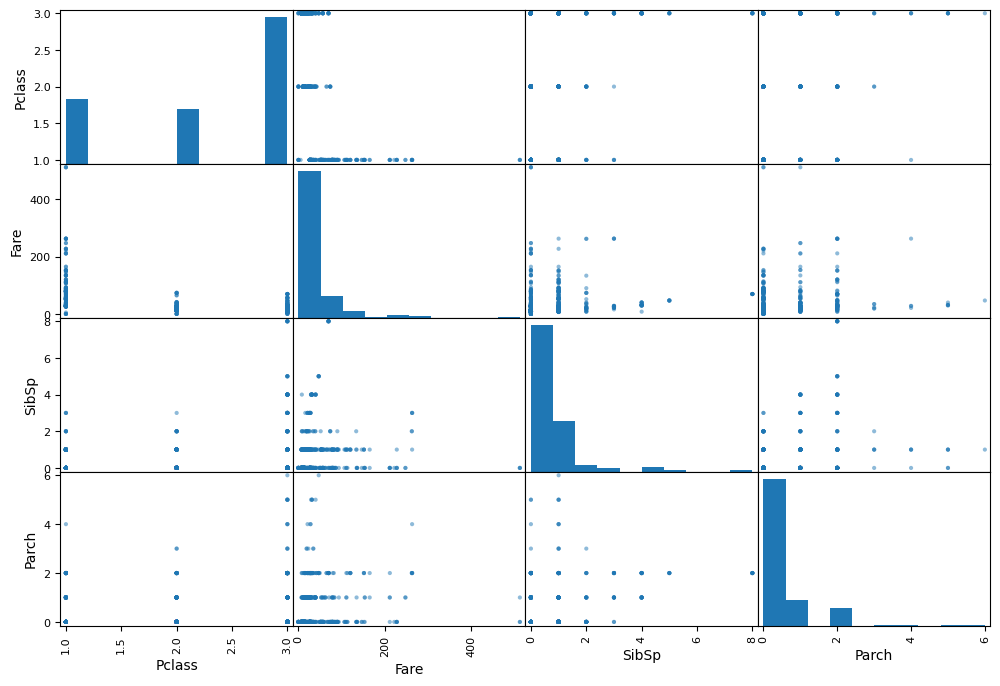

In [6]:
from pandas.plotting import scatter_matrix

attributes = ["Sex", "Pclass", "Fare", "SibSp", "Parch"]
scatter_matrix(titanic_aazain[attributes], figsize=(12, 8))
plt.show()

The scatter matrix shows the relationships between the number of survivors and the following features: Gender, Passenger class, Fare, Number of siblings/spouses aboard, Number of parents/children aboard. 

From the scatter matrix, we can see that there is a negative correlation between the passenger class and the fare. This means that the higher the passenger class, the lower the fare. We can also see that there is a positive correlation between the number of siblings/spouses aboard and the number of parents/children aboard. This means that the more siblings/spouses aboard, the more parents/children aboard.

Also, we can see that there is a higher number of male passengers in the third class, and a higher number of female passengers in the first and second classes. We can also see that the majority of passengers did not have any siblings/spouses or parents/children aboard. 

### d. Data transformation

1. Drop the four columns you identified in point (b.4) above.

In [7]:
#drop name, fare, cabin, ticket
titanic_aazain.drop(['Name', 'Fare', 'Cabin', 'Ticket'], axis=1, inplace=True)

<bound method DataFrame.info of      PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch Embarked
0              1         0       3    male  22.0      1      0        S
1              2         1       1  female  38.0      1      0        C
2              3         1       3  female  26.0      0      0        S
3              4         1       1  female  35.0      1      0        S
4              5         0       3    male  35.0      0      0        S
..           ...       ...     ...     ...   ...    ...    ...      ...
886          887         0       2    male  27.0      0      0        S
887          888         1       1  female  19.0      0      0        S
888          889         0       3  female   NaN      1      2        S
889          890         1       1    male  26.0      0      0        C
890          891         0       3    male  32.0      0      0        Q

[891 rows x 8 columns]>

In [9]:
titanic_aazain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000


2. Using “Get dummies” transform all the categorical variables in your dataframe into numeric values. (There should be two columns)

In [10]:
categorical_cols = ["Sex", "Embarked"]
one_hot_encoded = pd.get_dummies(titanic_aazain[categorical_cols], columns=categorical_cols)

3. Attach the newly created variables to your dataframe and drop the original columns.

In [ ]:
titanic_aazain = pd.concat([titanic_aazain, one_hot_encoded], axis=1)

4. Remove the original categorical variables columns. Use pandas drop method and select the correct argument values. 

In [ ]:
titanic_aazain = titanic_aazain.drop(categorical_cols, axis=1)

5. Replace the missing values in the Age with the mean of the age.

In [ ]:
mean_age = titanic_aazain['Age'].mean()
titanic_aazain['Age'].fillna(mean_age, inplace=True)

6. Change all column types into float.

In [ ]:
titanic_aazain = titanic_aazain.astype(float)

In [ ]:
titanic_aazain.info()

8. Write a function that accepts a dataframe as an argument and normalizes all the data points in the dataframe. Use pandas .min() and .max().

In [ ]:
def normalize_dataframe(titanic_aazain):
    min_values = titanic_aazain.min()
    max_values = titanic_aazain.max()
    
    normalized_titanic_aazain = (titanic_aazain - min_values) / (max_values - min_values)
    
    return normalized_titanic_aazain

9. Call the new function and pass as an argument your transformed dataframe. By now all your data is numeric.

In [ ]:
normalized_titanic_aazain = normalize_dataframe(titanic_aazain)

10. Display (print) the first two records.

In [ ]:
normalized_titanic_aazain.head(2)

11. Use pandas.hist to generate a plot showing all the variables histograms. Set the figure size to 9 inches by 10 inches.

In [ ]:
plt.figure(figsize=(9, 10))
titanic_aazain.hist(bins=20, grid=False, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Titanic Data Variables", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

12. Form the histogram generated focus on the “Port of Embarkation” and write in your written response some highlights (Conclusions).

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
titanic_aazain['Embarked_C'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Port of Embarkation (C)')

plt.subplot(132)
titanic_aazain['Embarked_Q'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Port of Embarkation (Q)')

plt.subplot(133)
titanic_aazain['Embarked_S'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Port of Embarkation (S)')

plt.tight_layout()
plt.show()

- Southampton (S) was the primary port of embarkation for passengers on the Titanic, with a considerably higher number of passengers compared to Cherbourg (C) and Queenstown (Q).
- Cherbourg (C) had a notable number of passengers but was still smaller in comparison to Southampton.
- Queenstown (Q) had the fewest passengers among the three ports.

13. Split the features into a dataframe named x_aazain and the target class into another dataframe named y_aazain.

In [ ]:
x_aazain = titanic_aazain.drop('Survived', axis=1)
y_aazain = titanic_aazain['Survived']

14. Using Sklearn “train_test_split” split your data into 70% for training and 30% for testing, set the random seed to be the last two digits of your student ID number. Store the training data in a dataframe named: x_train_aazain for the features (predictors) and the training labels y_train_aazain. Store the test data as follows: x_test_aazain and y_test_aazain.

In [ ]:
random_seed = 42
x_train_aazain, x_test_aazain, y_train_aazain, y_test_aazain = train_test_split(
    x_aazain, y_aazain, test_size=0.30, random_state=random_seed
)

### e. Build & validate the model

1. Using sklearn fit a logistic regression model to the training data. Name the model aazain_model.

In [ ]:
aazain_model = LogisticRegression(max_iter=1000)
aazain_model.fit(x_train_aazain, y_train_aazain)

2. Display (print) the coefficients (i.e. the weights of the model)

In [ ]:
coefficients = aazain_model.coef_
coefficients_df = pd.DataFrame(list(zip(x_train_aazain.columns, np.transpose(coefficients))))
print(coefficients_df)

3. Cross validation:

1. Use Sklearn cross_val_score to validate the model on the training data.
2. Set the number of folds cv to 10.
3. Repeat the validation for different splits of the train/ test. Start at test size 10% and reach test size 50% increasing your test sample by 5%.
4. In each run print out the minimum, mean and maximum accuracy of the score.
5. Note these results in your writer report and recommended the best split scenario.

In [ ]:
test_sizes = np.arange(0.10, 0.51, 0.05)

min_accuracies = []
mean_accuracies = []
max_accuracies = []

for test_size in test_sizes:
    num_samples_test = int(len(x_train_aazain) * test_size)
    accuracies = cross_val_score(aazain_model, x_train_aazain, y_train_aazain, cv=10, scoring='accuracy')
    min_accuracies.append(accuracies.min())
    mean_accuracies.append(accuracies.mean())
    max_accuracies.append(accuracies.max())

for i, test_size in enumerate(test_sizes):
    print(f"Test Size: {int(test_size * 100)}%")
    print(f"Minimum Accuracy: {min_accuracies[i]:.4f}")
    print(f"Mean Accuracy: {mean_accuracies[i]:.4f}")
    print(f"Maximum Accuracy: {max_accuracies[i]:.4f}")
    print()

best_split_index = np.argmax(mean_accuracies)
best_split_size = test_sizes[best_split_index] * 100
print(f"The best split scenario is with a test size of {int(best_split_size)}%.")


### f. Test the model

1. Rebuild the model using the 70% - 30% train/test split.

In [ ]:
x_train_aazain, x_test_aazain, y_train_aazain, y_test_aazain = train_test_split(
    x_aazain, y_aazain, test_size=0.30, random_state=42
)
aazain_model = LogisticRegression(max_iter=1000)

aazain_model.fit(x_train_aazain, y_train_aazain)

2. Define a new variable y_pred_aazain where aazain is your aazain, store the predicted probabilities of the model in this variable (hint: use predict_proba)

In [ ]:
y_pred_aazain = aazain_model.predict_proba(x_test_aazain)

3. Define another variable name it y_pred_aazain_flag , store in the y_pred_aazain after transforming the probabilities into a bolean value of true or false based on a threshold value of 0.5. (hint : y_pred_mayy_flag = y_pred[:,1] > 0.5)

In [ ]:
y_pred_aazain = aazain_model.predict_proba(x_test_aazain)
y_pred_aazain_flag = y_pred_aazain[:, 1] > 0.5

4. From sklearn metrics import : confusion_matrix, accuracy_score, classification_report

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

5. Print out the accuracy of the model on the test data.

In [ ]:
accuracy = accuracy_score(y_test_aazain, y_pred_aazain_flag)
print(f"Accuracy of the model on the test data: {accuracy:.4f}")

6. Print out the confusion matrix.

In [ ]:
conf_matrix = confusion_matrix(y_test_aazain, y_pred_aazain_flag)
print(conf_matrix)

7. Print out the classification report.

In [ ]:
class_report = classification_report(y_test_aazain, y_pred_aazain_flag)

8. Write down and note the values of : accuracy, precision and re-call

In [ ]:
accuracy = accuracy_score(y_test_aazain, y_pred_aazain_flag)
report = classification_report(y_test_aazain, y_pred_aazain_flag)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

9. Repeat steps 3 to 6 with changing the threshold value to 0.75

In [ ]:
y_pred_aazain = aazain_model.predict_proba(x_test_aazain)
y_pred_aazain_flag = y_pred_aazain[:, 1] > 0.75
# the 0.75 signifies the threshold for flagging a passenger as a survivor
# where the probability of survival is greater than 0.75

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
accuracy = accuracy_score(y_test_aazain, y_pred_aazain_flag)
print(f"Accuracy of the model on the test data: {accuracy:.4f}")

In [ ]:
conf_matrix = confusion_matrix(y_test_aazain, y_pred_aazain_flag)
print(conf_matrix)

10. Compare the accuracy on the test data with the accuracy generated using the training data.

In [ ]:
train_accuracy = accuracy_score(y_train_aazain, aazain_model.predict(x_train_aazain))
test_accuracy = accuracy_score(y_test_aazain, y_pred_aazain_flag)
print(f"Accuracy on Training Data: {train_accuracy:.4f}")
print(f"Accuracy on Test Data: {test_accuracy:.4f}")

**Analyis**

        Accuracy on Training Data: 0.8010
        Accuracy on Test Data: 0.7612

- The accuracy on the training data is higher than the accuracy on the test data. This means that the model is overfitting the training data.
- Which also means that the model is not generalizing well to new data.
- The model is not performing well on the test data.
- The diffrence of 0.8010 - 0.7612 = 0.0398 is because the model is overfitting the training data.

11. Compare the values of accuracy, precision and re-call generated at the threshold 0.5 and 0.75 .

**Threshold of 0.5**

    Accuracy: 0.8097
    Classification Report:
                precision    recall  f1-score   support

            0.0       0.82      0.87      0.84       157
            1.0       0.79      0.73      0.76       111

        accuracy                           0.81       268
       macro avg       0.81      0.80      0.80       268
    weighted avg       0.81      0.81      0.81       268

**Threshold of 0.75**

    Accuracy: 0.7612
    Classification Report:
                precision    recall  f1-score   support

            0.0       0.71      0.99      0.83       157
            1.0       0.96      0.44      0.60       111

        accuracy                           0.76       268
       macro avg       0.84      0.71      0.72       268
    weighted avg       0.82      0.76      0.74       268

- At a threshold of 0.5, the model achieves higher accuracy (0.8097) compared to the threshold of 0.75 (0.7612). This suggests that the model is better at making predictions at a lower threshold.

- Precision and recall vary significantly between the two thresholds. At the 0.5 threshold, precision is higher for Class 0 (survival) and Class 1 (not survival), and recall is balanced between the two classes.